In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading/loading dataset
df= pd.read_csv("../input/indianeedsoxygen-tweets/IndiaWantsOxygen.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Mayukh,"Cary, NC",✌️☮️,2009-07-26 00:42:50,347,267,1769,False,2021-04-27 23:56:16,Carnage.\nAnarchy.\n#IndiaNeedsOxygen,['IndiaNeedsOxygen'],Twitter for Android,False
1,Chris,United Kingdom,"Usually, heading off to watch a sunset somewhe...",2020-04-09 09:40:11,2976,4953,43213,False,2021-04-27 23:54:29,India doesn’t need Military Tanks - They need ...,"['ToryCorruption', 'IndiaNeedsOxygen']",Twitter for iPhone,False
2,Folker Treasure Natural Gems And Jewelry Supplier,"لاہور, پاکستان",Gemologist 🔬\nNatural Gems world wide supplier...,2020-12-02 19:05:20,52,276,259,False,2021-04-27 23:53:10,Hi Friends Please pray for Indian peoples. The...,"['IndiaFightsBack', 'Covid19IndiaHelp', 'India...",Twitter for iPhone,False
3,Abdul Waheed Afridi🇵🇰,Peshawar/ Lahore,"Assistance Info. Sec- @JIYouthOfficial, Tribal...",2018-11-01 15:09:43,1054,332,51553,False,2021-04-27 23:48:33,These boys had several times refused to go to ...,"['India', 'COVID19', 'IPL', 'IndiaFightsBack',...",Twitter for Android,False
4,Ciaràn Foy,"Manchester, England",Taco King 🌮\n@crunchedtacos,2017-06-21 21:39:06,847,485,964,False,2021-04-27 23:46:04,Can we please give all the help we can to Indi...,"['COVID19', 'Covid19IndiaHelp', 'IndiaNeedsOxy...",Twitter for Android,False


In [4]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [8]:
df.shape

(28533, 13)

In [6]:
df.isnull().sum()

user_name             50
user_location       7845
user_description    3146
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags              50
source                 0
is_retweet             0
dtype: int64

In [ ]:
#dropping username null rows

In [16]:
df= df[pd.notnull(df["user_name"])]

In [17]:
df.isnull().sum()

user_name              0
user_location       7795
user_description    3146
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags               0
source                 0
is_retweet             0
dtype: int64

In [132]:
len(df)

28483

In [134]:
len(df.user_name.unique())

20237

In [ ]:
#28,383 number of tweets from more than twenty thousand users across the world based on #Indianeedoxygen

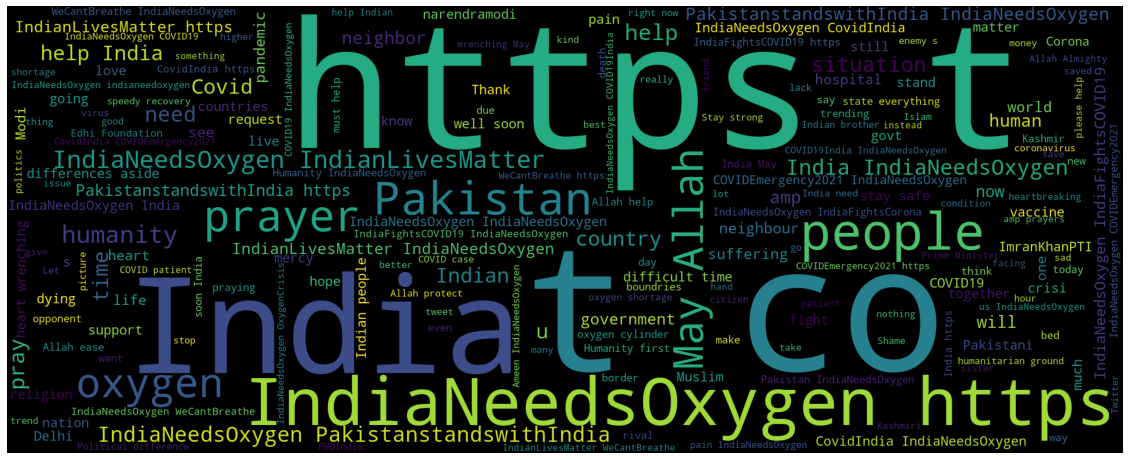

In [27]:
#wordcloud visualisation of texts within the tweets
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,20))
words= "".join(df["text"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   
     

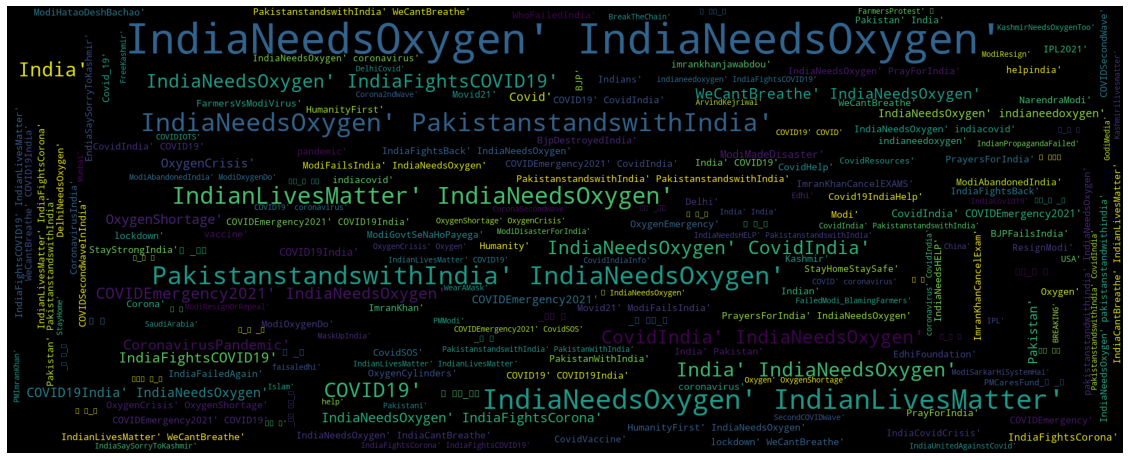

In [31]:
#wordcloud visualisation of hashtags used during tweets
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,20))
words= "".join(df["hashtags"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   
     

In [35]:
#top locations from where people tweeted
df.user_location.value_counts().head(15)

Pakistan                       1284
Lahore, Pakistan                981
Karachi, Pakistan               966
Islamabad, Pakistan             849
India                           740
New Delhi, India                443
Punjab, Pakistan                419
Peshawar, Pakistan              259
Mumbai, India                   235
Sindh, Pakistan                 178
Multan, Pakistan                174
London, England                 153
Rawalpindi, Pakistan            147
France                          138
Dubai, United Arab Emirates     135
Name: user_location, dtype: int64

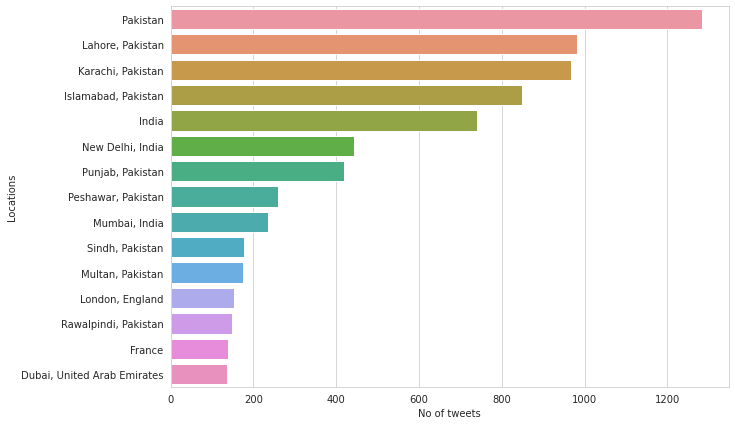

In [118]:
#Pakistan is the top location for the tweets on #indianeedsoxygen varying from cities like lahore and karachi
#England ,France,Dubai were other location countries that followed

x= df.user_location.value_counts().head(15)
plt.figure(figsize= (10,7))
sns.set_style("whitegrid")
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("No of tweets")
ax.set_ylabel("Locations")
plt.show()

In [65]:
#setting date datatype to date column and removing time values from date for plotting
df["date"]= pd.to_datetime(df.date)
df.date= df.date.apply(lambda x: str(x).split(" ")[0])
df.date

0        2021-04-27
1        2021-04-27
2        2021-04-27
3        2021-04-27
4        2021-04-27
            ...    
28528    2021-04-24
28529    2021-04-24
28530    2021-04-24
28531    2021-04-24
28532    2021-04-24
Name: date, Length: 28483, dtype: object

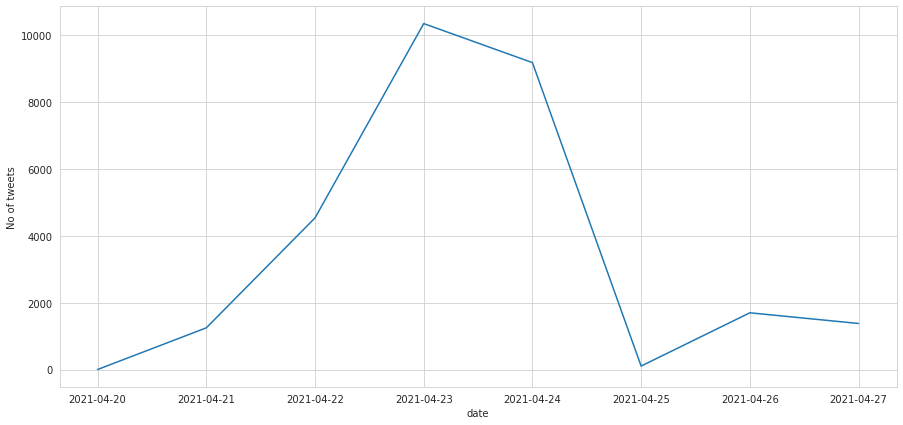

In [117]:
#Number of tweets over time
x= df.groupby("date").date.count()
plt.figure(figsize= (15,7))
sns.set_style("whitegrid")
ax= sns.lineplot(x.index,x.values)
ax.set_xlabel("date")
ax.set_ylabel("No of tweets")
plt.show()


In [94]:
#Top sources used for tweets
df.source.value_counts()

Twitter for Android                 19078
Twitter for iPhone                   5144
Twitter Web App                      3943
Twitter for iPad                      160
TweetDeck                              69
Hootsuite Inc.                         15
KhuramKTS                              13
Twitter for Mac                        10
Microsoft Power Platform                8
Instagram                               6
Twitter Media Studio                    5
LinkedIn                                4
Tall Tweets                             4
Socialbakers                            3
Tumblr                                  2
IFTTT                                   2
dlvr.it                                 2
Buffer                                  2
Twitter for Advertisers                 1
Mediabites                              1
HW news english                         1
Publer.io                               1
UberSocial for Android                  1
Threader_client                   

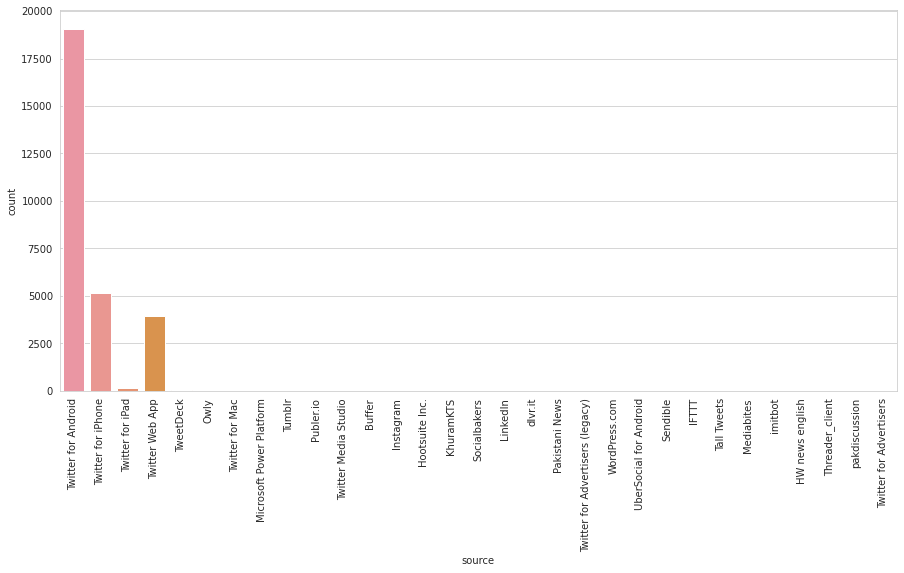

In [104]:
#Top sources coutplot
plt.figure(figsize= (15,7))
ax= sns.countplot(x= "source",data= df)
plt.xticks(rotation=90)
plt.show()

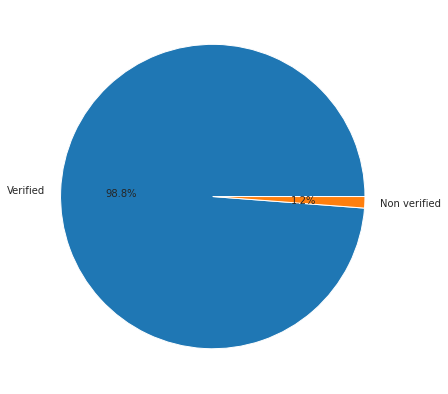

In [111]:
#Out of overall users that tweeted, 98% of the users are verified users
x= df.user_verified.value_counts()
plt.figure(figsize= (15,7))
labels=("Verified","Non verified")
plt.pie(x,labels= labels,autopct= "%1.1f%%")
plt.show()

In [116]:
#Not a single tweet in the dataset is a retweet
x= df.is_retweet.value_counts()
x

False    28483
Name: is_retweet, dtype: int64

In [121]:
#users with most(multiple) tweets on the subject
df.user_name.value_counts().head(20)

Jabberwocky                             135
#OxygenShortage 🇮🇳 Prof. Navin Kumar     50
gurpreet singh                           48
ɪsʜᴀᴀɴ ᴄʜᴀᴜᴅʜᴀʀʏ 🌟                       34
Debangshu Chanda                         33
Adnan Khan 🇵🇰                            31
Licypriya Kangujam                       30
#LivesMatter 🏡 ↗️                        28
Komal                                    27
JERRY                                    25
🅰️HMAD🇵🇰                                 24
Mola Jatt                                24
ѕнєємα | check pin 📌                     24
Baramulla Update                         22
Azmathussain                             22
Ahmed Hassan                             21
@MR.BAT                                  21
Amardeep Kumar                           20
Haris Ansari 🇮🇳 (Harry)                  20
shamoon(मुरादाबादी)                      19
Name: user_name, dtype: int64

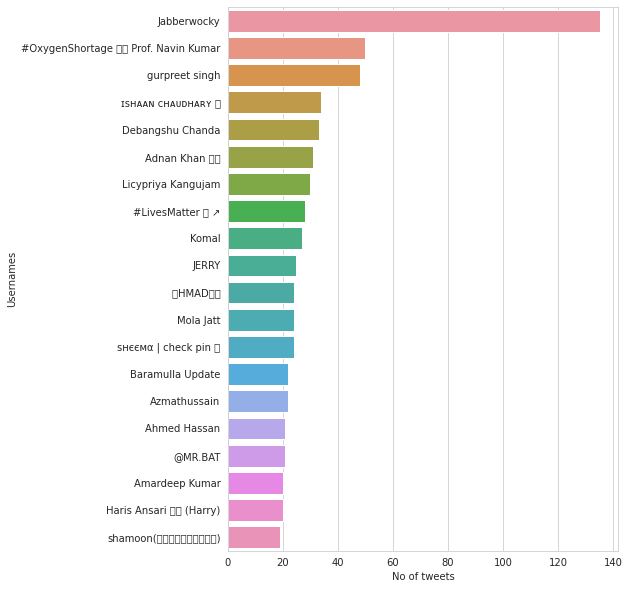

In [126]:
x= df.user_name.value_counts().head(20)
plt.figure(figsize= (7,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("No of tweets")
ax.set_ylabel("Usernames")
plt.show()


In [129]:
df.user_location.unique()

array(['Cary, NC', 'United Kingdom', 'لاہور, پاکستان', ..., 'hawa main❗',
       'Kohat , Pakistan', 'Behind the scene'], dtype=object)

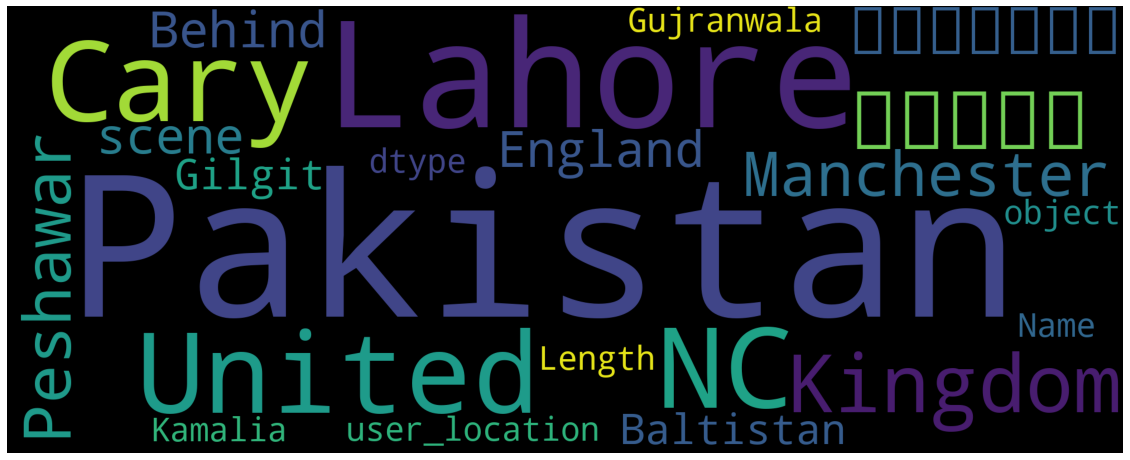

In [130]:
#wordcloud visualisation of locations for tweets
x = df[pd.notnull(df["user_location"])]
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,20))
words= "".join(str(x["user_location"]))
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   
     

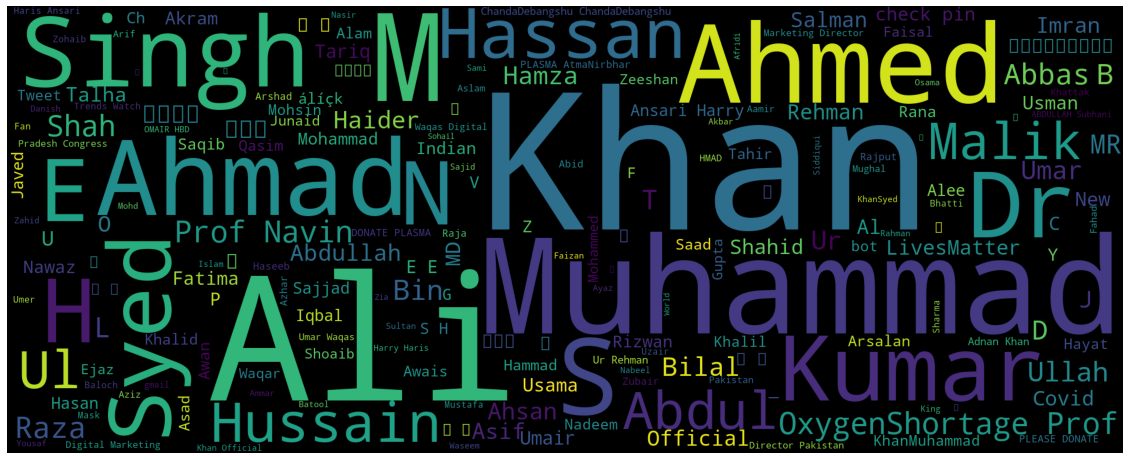

In [131]:
#wordcloud visualisation of usernames 
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,20))
words= "".join(df["user_name"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   
     